In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datasist as ds
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
df = pd.read_csv('data.csv')

In [3]:
#EDA
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
df.info() # we have some null values in Product_Category_2 , Product_Category_3
          # We have some unnessecary columns like User_ID , Product_ID , 
          #Age should converted into bins 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe() #seems we have some outliers 

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.isnull().sum()# We have alot of missing values...

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
#Getting number of unique values for each column ... this is useful for the Categorical part , to see if there is inconssistancy of the column . (i.e. M,F ,m,f for male & female)
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [87]:
for column in ['Occupation','Gender','City_Category','Marital_Status','Product_Category_1','Age','Product_Category_2','Product_Category_3'] :
    print(f"column={column}")
    print(df[column].value_counts())
    print('\n-------------------\n')

column=Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

-------------------

column=Gender
M    414259
F    135809
Name: Gender, dtype: int64

-------------------

column=City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

-------------------

column=Marital_Status
0    324731
1    225337
Name: Marital_Status, dtype: int64

-------------------

column=Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

-------------------

column=Age
26-35    219587


In [88]:
#Visualization

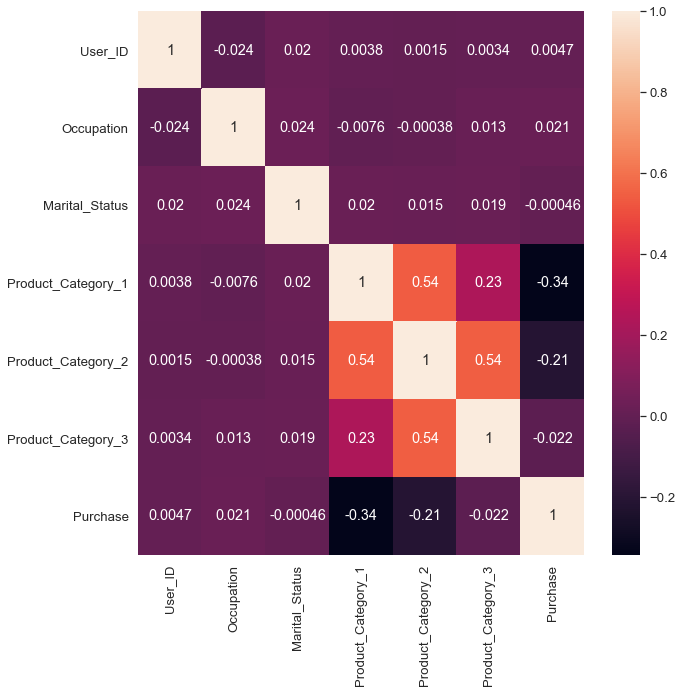

In [89]:
sns.heatmap(df.corr(),annot=True) #2&1 , 2&3

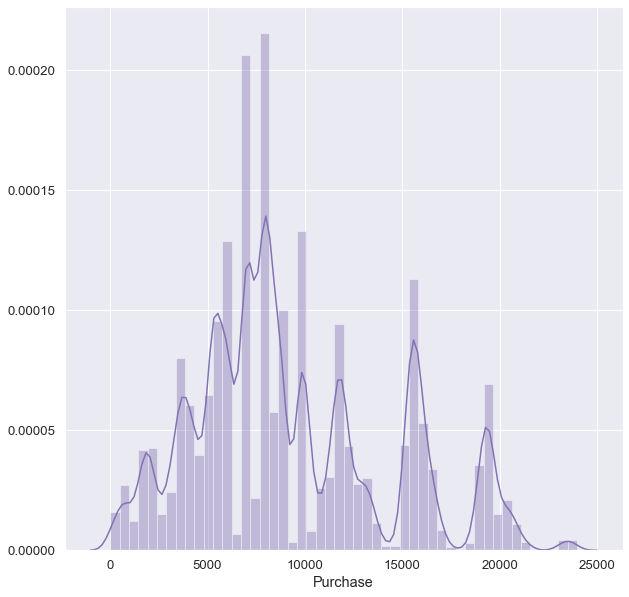

In [90]:
sns.distplot(df['Purchase'], color='m') #purcahse amount = 7500  is most common

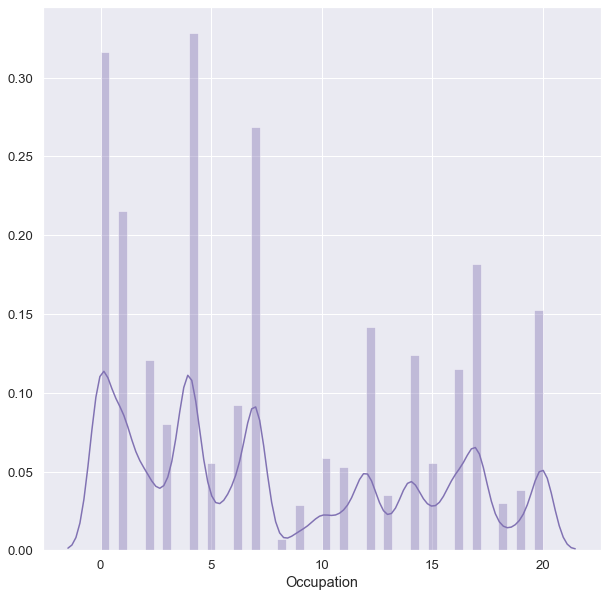

In [91]:
sns.distplot(df['Occupation'], color='m')

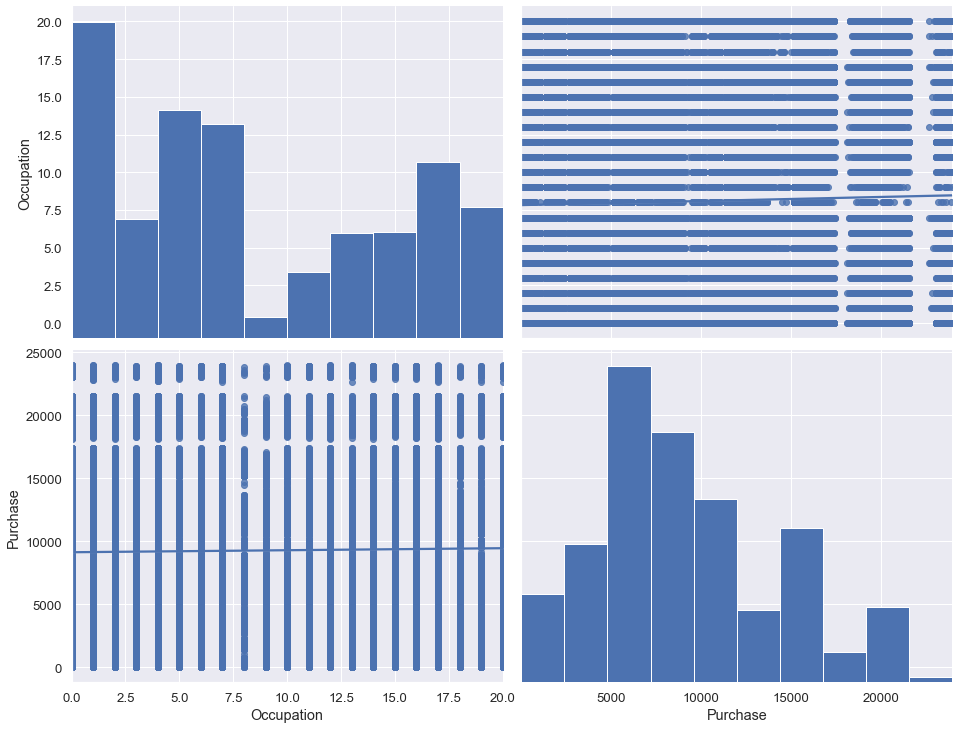

In [93]:
sns.pairplot(df, vars=['Occupation', 'Purchase'],kind='reg',  height=5, aspect=1.3)
#Maybe purchase will need some discretization

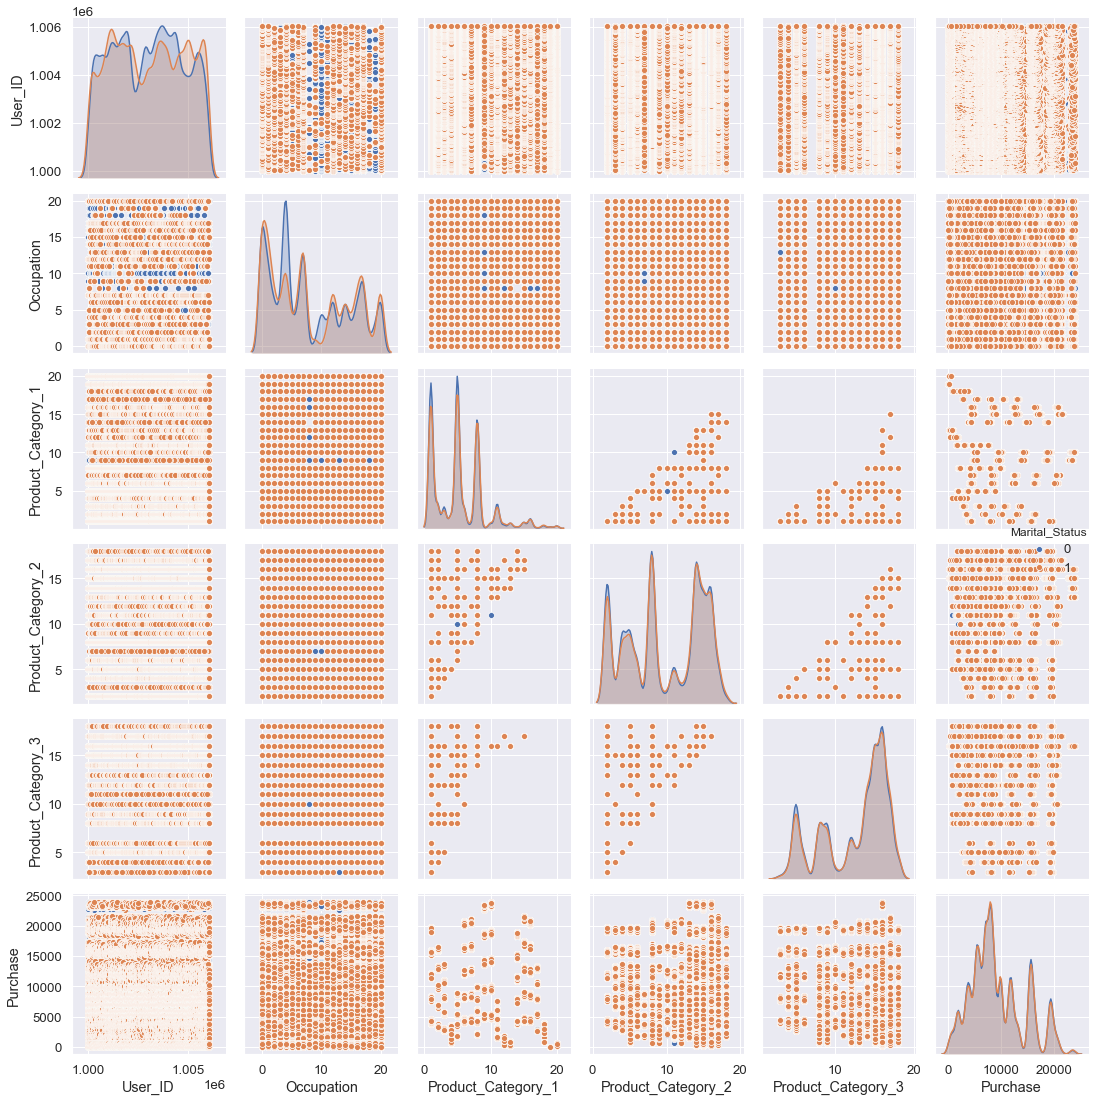

In [8]:
sns.pairplot(df,hue='Marital_Status')# it seems that the two types of mat status have the same purchases 
                                     # I see some positive correlations

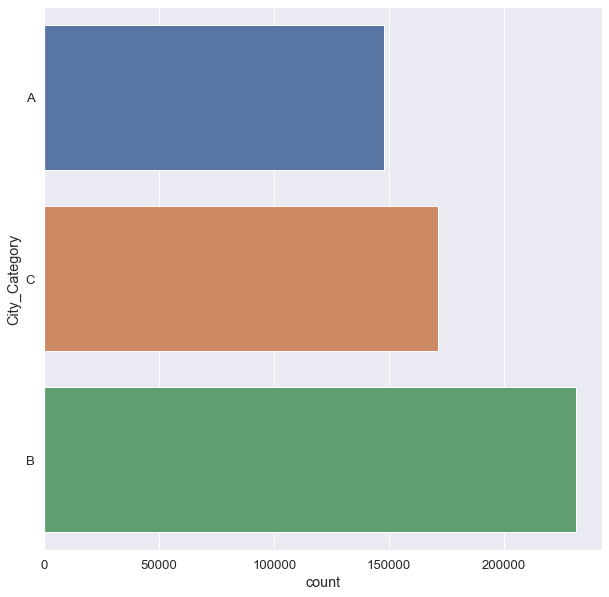

In [35]:
sns.countplot(y='City_Category', data=df) #People from B are the most 

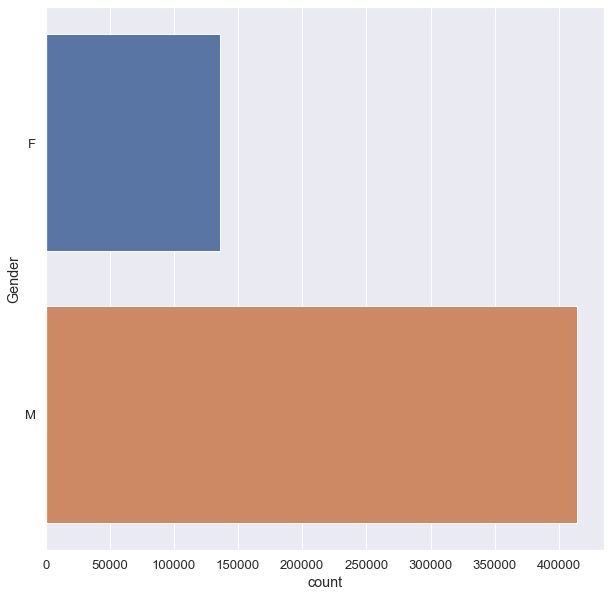

In [33]:
sns.countplot(y='Gender', data=df) 

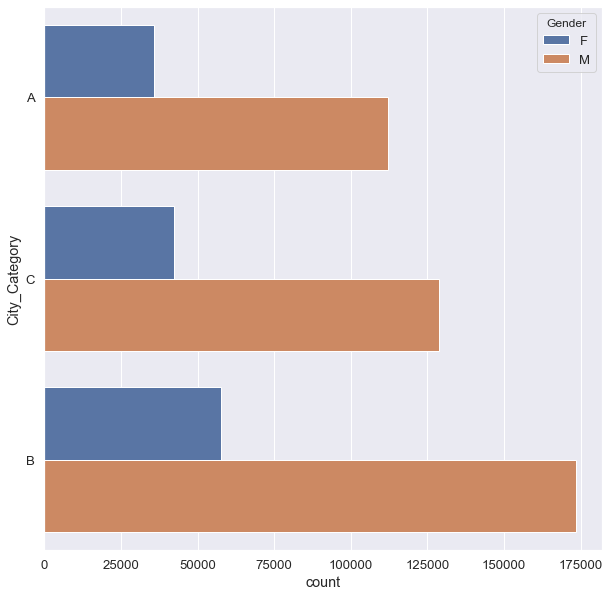

In [36]:
sns.countplot(y='City_Category',hue='Gender', data=df) #People from B are the most 
#male are the mojority of the data 

/Users/mac/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


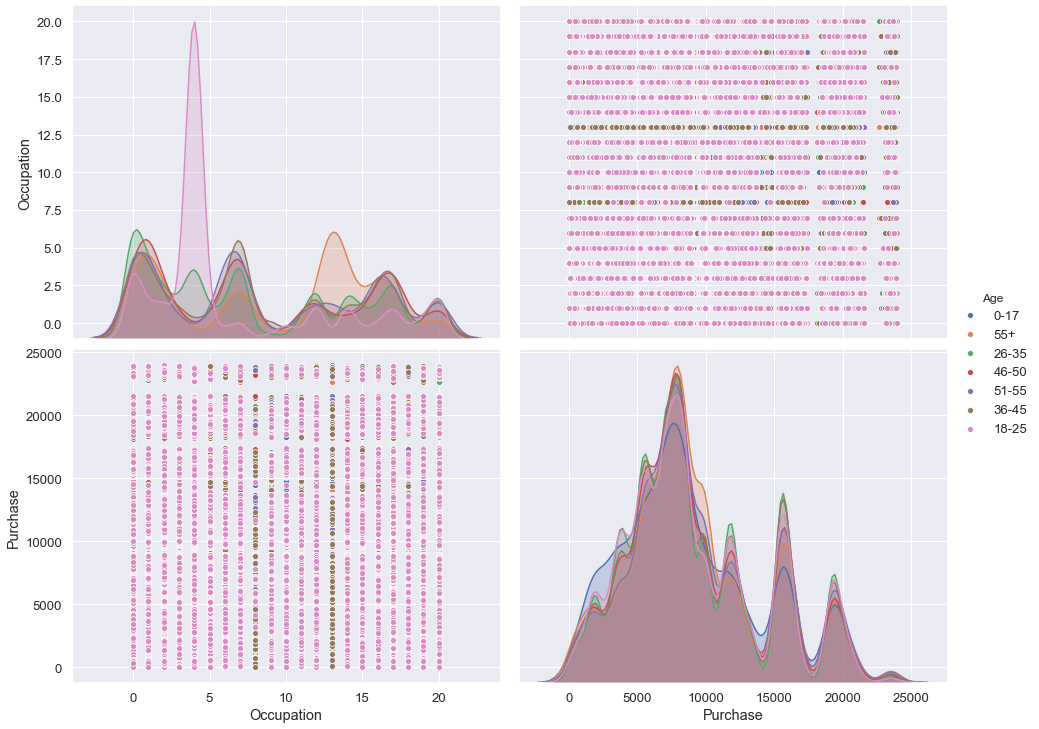

In [15]:
sns.pairplot(df, vars=['Occupation', 'Purchase'],hue='Age' ,height=5, aspect=1.3)
#Most records are 18-25 
#occupation 2 is very frequent for the age 18-25
#Purchases of 7.5K is very frequent for people 55+ 


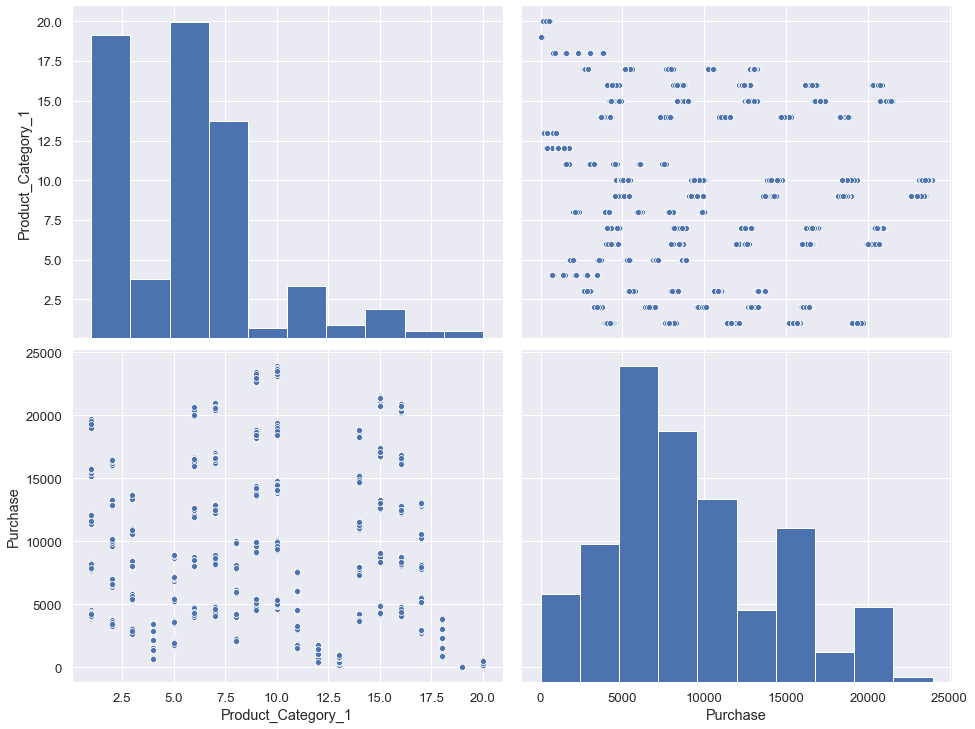

In [20]:
sns.pairplot(df, vars=['Product_Category_1', 'Purchase'],height=5, aspect=1.3)


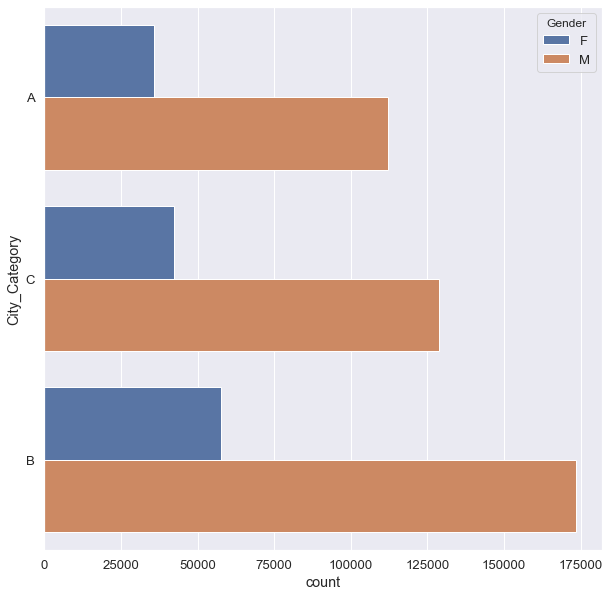

In [39]:
sns.countplot(y='City_Category',hue='Gender', data=df) #People from B are the most 


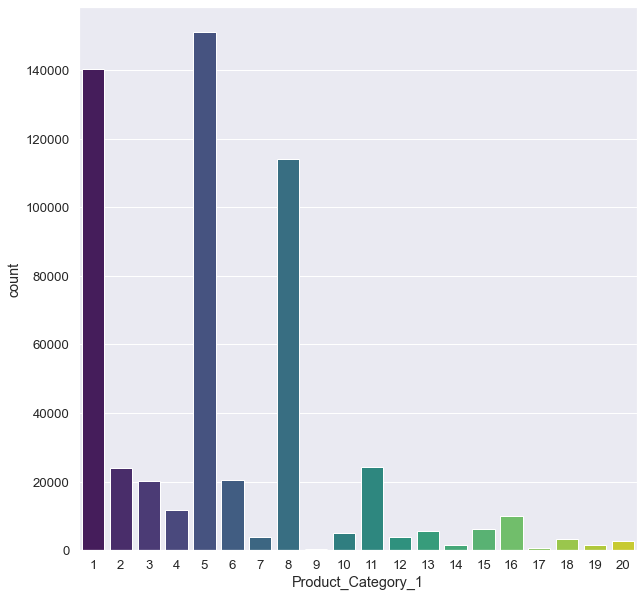

In [40]:
sns.countplot(x='Product_Category_1', data=df, palette='viridis')

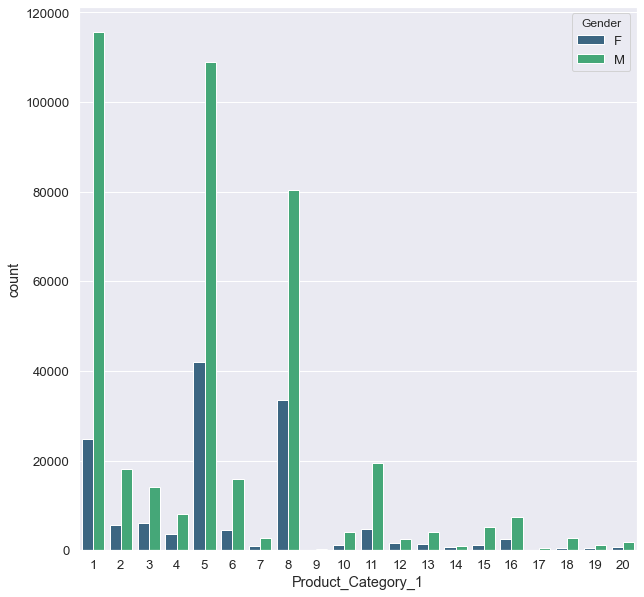

In [41]:
sns.countplot(x='Product_Category_1',hue='Gender', data=df, palette='viridis')

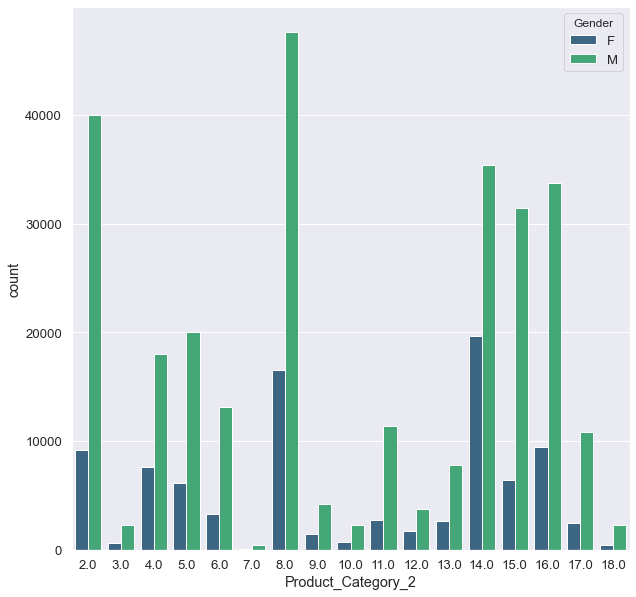

In [42]:
sns.countplot(x='Product_Category_2',hue='Gender', data=df, palette='viridis')

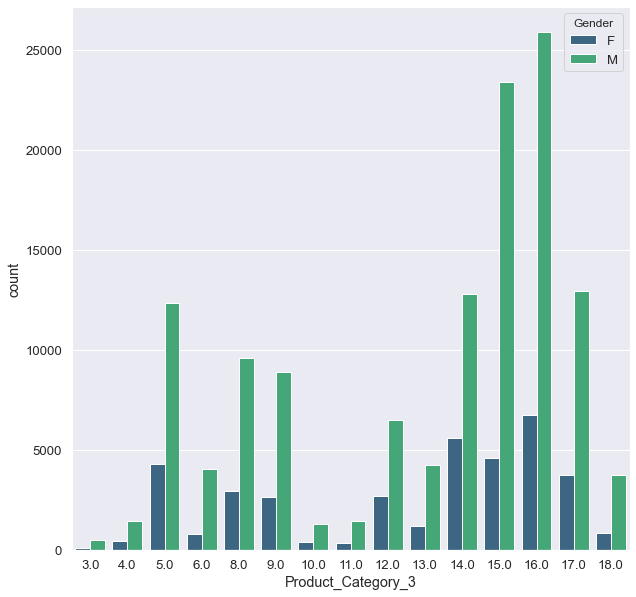

In [43]:
sns.countplot(x='Product_Category_3',hue='Gender', data=df, palette='viridis')

# checking Outliers 

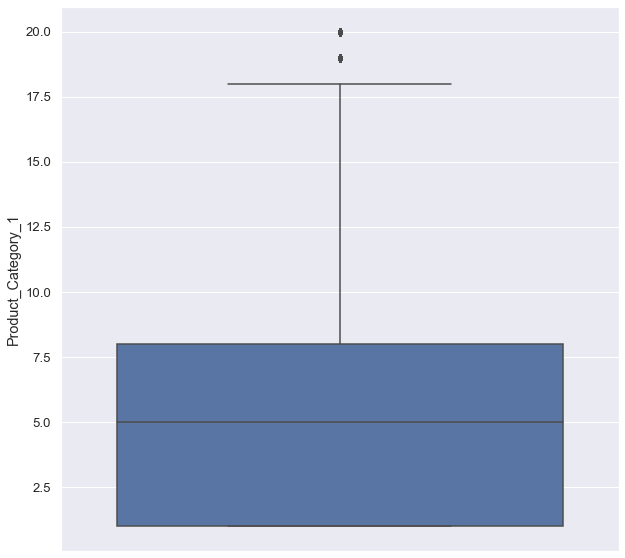

In [67]:
#Outliers 
sns.boxplot(y='Product_Category_1', data=df)


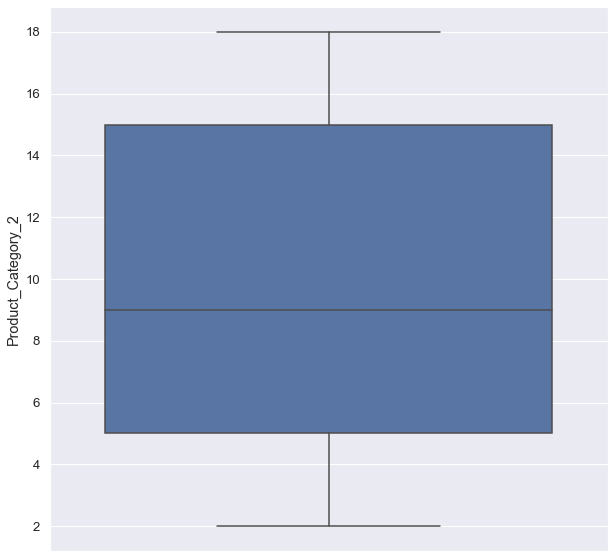

In [68]:
sns.boxplot(y='Product_Category_2', data=df)


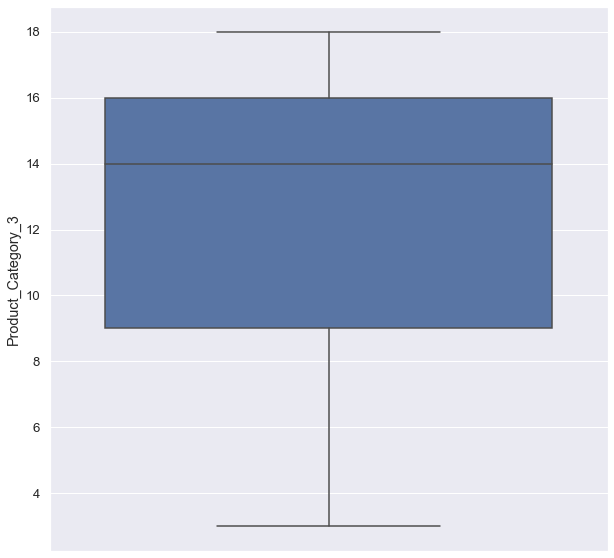

In [69]:
sns.boxplot(y='Product_Category_3', data=df)


In [70]:
#Checking outliers manually
checked = ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
print("Checking Outliers Manually")

for col in checked:
    outliers_indices = ds.structdata.detect_outliers(df, 0, [col])
    print(f'in col: {col} , there is about {len(outliers_indices)} outliers \n')
    
    


Checking Outliers Manually
in col: Occupation , there is about 0 outliers 

in col: Marital_Status , there is about 0 outliers 

in col: Product_Category_1 , there is about 4153 outliers 

in col: Product_Category_2 , there is about 0 outliers 

in col: Product_Category_3 , there is about 0 outliers 



In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Data preprocessing

## Detecting the outliers using ds.structudata & changing by median 

In [10]:
checked = ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

for col in checked:
    outliers_indices = ds.structdata.detect_outliers(df, 0, [col])
    print(f'in col: {col} , there is about {len(outliers_indices)} outliers Ya amr... updating by the median\n')
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median
    


in col: Occupation , there is about 0 outliers Ya amr... updating by the median

in col: Marital_Status , there is about 0 outliers Ya amr... updating by the median

in col: Product_Category_1 , there is about 0 outliers Ya amr... updating by the median

in col: Product_Category_2 , there is about 0 outliers Ya amr... updating by the median

in col: Product_Category_3 , there is about 0 outliers Ya amr... updating by the median



## imputing missing values

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 
df['Product_Category_2'] = imputer.fit_transform(df[['Product_Category_2']])
df['Product_Category_3'] = imputer.fit_transform(df[['Product_Category_3']])

In [12]:
df.info() #all values are imputed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  float64
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  float64
 8   Product_Category_1          550068 non-null  float64
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 50.4+ MB


In [13]:
#drop user_ID 
#change product_ID into ID as a number 
#Gender change to 1,0 
#City category into 1,2,3 
df.drop('User_ID',axis=1,inplace=True)
df.drop('Product_ID',axis=1,inplace=True)



In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [14]:
#expanding all categorical data as multiple columns & getting their dummy values 
df = pd.get_dummies(df, columns=df.columns[:-1], drop_first=True)



In [15]:
df

,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1.0,Occupation_2.0,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,8370,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,15200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1422,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7969,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,368,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
550064,371,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
550065,137,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
550066,365,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
#Lets drop Y and 
x=df.drop('Purchase',axis=1) #drop column IFT (not removing it totally ... just temprary to store into x)
y = df['Purchase']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)



In [105]:
x_train.shape

(440054, 83)

In [106]:
x_test.shape

(110014, 83)

In [ ]:
model = XGBClassifier(n_estimators=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))  #The diffrence is ±3022 between real & my data 

3022.739144450295

In [18]:
model.score(x_train, y_train)  #R2 Score is about 0.63

0.6369080684275131

In [19]:
model.score(x_test, y_test)  #Actually it perfromes better on the testing data 

0.6392094254128986

In [20]:
pd.DataFrame(model.coef_, x.columns, columns=["Coeff"]) #These are the coffecient for Multi-Linear Regreisson

,Coeff
Gender_M,-49.194175
Age_18-25,-133.218760
Age_26-35,-48.129870
Age_36-45,67.423923
Age_46-50,78.670717
...,...
Product_Category_3_14.0,-353.175822
Product_Category_3_15.0,-805.432952
Product_Category_3_16.0,-319.615007
Product_Category_3_17.0,606.711861
